In [0]:
!pip install scikit-plot
%matplotlib inline
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras import backend as K
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
def keras_internal_binary_classification_accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)))
def custom_accuracy(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp + tn)
    denominator = (tp + tn + fp + fn)

    return numerator / (denominator + K.epsilon())
from google.colab import files
uploaded = files.upload()
df = uploaded
df = pd.read_csv('train_pronto.csv')
df.drop(['Unnamed: 0', 'weekend'], axis = 1, inplace = True)
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

Using TensorFlow backend.


Saving train_pronto.csv to train_pronto.csv


In [0]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model

In [0]:
es = EarlyStopping(monitor='val_loss', patience=15)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)
model1 = build_model()
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=10).history

model2 = build_model()
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=50).history

model3 = build_model()
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=100).history
model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=150).history
model5 = build_model()
history5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=200).history
test_loss_1, test_custom_acc_1, test_acc_1 = model1.evaluate(X_test, y_test, batch_size = 10)
test_loss_2, test_custom_acc_2, test_acc_2 = model1.evaluate(X_test, y_test, batch_size = 50)
test_loss_3, test_custom_acc_3, test_acc_3 = model1.evaluate(X_test, y_test, batch_size = 100)
test_loss_4, test_custom_acc_4, test_acc_4 = model1.evaluate(X_test, y_test, batch_size = 150)
test_loss_5, test_custom_acc_5, test_acc_5 = model1.evaluate(X_test, y_test, batch_size = 200)
test_loss_6, test_custom_acc_6, test_acc_6 = model2.evaluate(X_test, y_test, batch_size = 10)
test_loss_7, test_custom_acc_7, test_acc_7 = model2.evaluate(X_test, y_test, batch_size = 50)
test_loss_8, test_custom_acc_8, test_acc_8 = model2.evaluate(X_test, y_test, batch_size = 100)
test_loss_9, test_custom_acc_9, test_acc_9 = model2.evaluate(X_test, y_test, batch_size = 150)
test_loss_10, test_custom_acc_10, test_acc_10 = model2.evaluate(X_test, y_test, batch_size = 200)
test_loss_11, test_custom_acc_11, test_acc_11 = model3.evaluate(X_test, y_test, batch_size = 10)
test_loss_12, test_custom_acc_12, test_acc_12 = model3.evaluate(X_test, y_test, batch_size = 50)
test_loss_13, test_custom_acc_13, test_acc_13 = model3.evaluate(X_test, y_test, batch_size = 100)
test_loss_14, test_custom_acc_14, test_acc_14 = model3.evaluate(X_test, y_test, batch_size = 150)
test_loss_15, test_custom_acc_15, test_acc_15 = model3.evaluate(X_test, y_test, batch_size = 200)
test_loss_16, test_custom_acc_16, test_acc_16 = model4.evaluate(X_test, y_test, batch_size = 10)
test_loss_17, test_custom_acc_17, test_acc_17 = model4.evaluate(X_test, y_test, batch_size = 50)
test_loss_18, test_custom_acc_18, test_acc_18 = model4.evaluate(X_test, y_test, batch_size = 100)
test_loss_19, test_custom_acc_19, test_acc_19 = model4.evaluate(X_test, y_test, batch_size = 150)
test_loss_20, test_custom_acc_20, test_acc_20 = model4.evaluate(X_test, y_test, batch_size = 200)
test_loss_21, test_custom_acc_21, test_acc_21 = model5.evaluate(X_test, y_test, batch_size = 10)
test_loss_22, test_custom_acc_22, test_acc_22 = model5.evaluate(X_test, y_test, batch_size = 50)
test_loss_23, test_custom_acc_23, test_acc_23 = model5.evaluate(X_test, y_test, batch_size = 100)
test_loss_24, test_custom_acc_24, test_acc_24 = model5.evaluate(X_test, y_test, batch_size = 150)
test_loss_25, test_custom_acc_25, test_acc_25 = model5.evaluate(X_test, y_test, batch_size = 200)

print('numero 1','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_1, test_custom_acc_1, test_acc_1))
print('numero 2','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_2, test_custom_acc_2, test_acc_2))
print('numero 3','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_3, test_custom_acc_3, test_acc_3))
print('numero 4','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_4, test_custom_acc_4, test_acc_4))
print('numero 5','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_5, test_custom_acc_5, test_acc_5))
print('numero 6','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_6, test_custom_acc_6, test_acc_6))
print('numero 7','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_7, test_custom_acc_7, test_acc_7))
print('numero 8','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_8, test_custom_acc_8, test_acc_8))
print('numero 9','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_9, test_custom_acc_9, test_acc_9))
print('numero 10','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_10, test_custom_acc_10, test_acc_10))
print('numero 11','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_11, test_custom_acc_11, test_acc_11))
print('numero 12','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_12, test_custom_acc_12, test_acc_12))
print('numero 13','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_13, test_custom_acc_13, test_acc_13))
print('numero 14','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_14, test_custom_acc_14, test_acc_14))
print('numero 15','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_15, test_custom_acc_15, test_acc_15))
print('numero 16','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_16, test_custom_acc_16, test_acc_16))
print('numero 17','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_17, test_custom_acc_17, test_acc_17))
print('numero 18','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_18, test_custom_acc_18, test_acc_18))
print('numero 19','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_19, test_custom_acc_19, test_acc_19))
print('numero 20','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_20, test_custom_acc_20, test_acc_20))
print('numero 21','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_21, test_custom_acc_21, test_acc_21))
print('numero 22','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_22, test_custom_acc_22, test_acc_22))
print('numero 23','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_23, test_custom_acc_23, test_acc_23))
print('numero 24','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_24, test_custom_acc_24, test_acc_24))
print('numero 25','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_25, test_custom_acc_25, test_acc_25))


Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 3s 222us/step - loss: 0.1545 - custom_accuracy: 0.9291 - accuracy: 0.9290 - val_loss: 0.1025 - val_custom_accuracy: 0.9538 - val_accuracy: 0.9538
Epoch 2/500
11513/11513 [==============================] - 2s 198us/step - loss: 0.0839 - custom_accuracy: 0.9697 - accuracy: 0.9697 - val_loss: 0.0629 - val_custom_accuracy: 0.9779 - val_accuracy: 0.9779
Epoch 3/500
11513/11513 [==============================] - 2s 197us/step - loss: 0.0659 - custom_accuracy: 0.9839 - accuracy: 0.9838 - val_loss: 0.0531 - val_custom_accuracy: 0.9866 - val_accuracy: 0.9866
Epoch 4/500
11513/11513 [==============================] - 2s 193us/step - loss: 0.0550 - custom_accuracy: 0.9859 - accuracy: 0.9859 - val_loss: 0.0506 - val_custom_accuracy: 0.9866 - val_accuracy: 0.9866
Epoch 5/500
11513/11513 [==============================] - 2s 198us/step - loss: 0.0527 - custom_accuracy: 0.9876 - accuracy: 0.987

In [0]:
best_model_noreg = build_model()
history_best_model_noreg = best_model_noreg.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=150).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 0s 43us/step - loss: 0.5550 - custom_accuracy: 0.7682 - accuracy: 0.7683 - val_loss: 0.2031 - val_custom_accuracy: 0.7682 - val_accuracy: 0.7684
Epoch 2/500
11513/11513 [==============================] - 0s 19us/step - loss: 0.1404 - custom_accuracy: 0.9347 - accuracy: 0.9346 - val_loss: 0.1138 - val_custom_accuracy: 0.9417 - val_accuracy: 0.9416
Epoch 3/500
11513/11513 [==============================] - 0s 19us/step - loss: 0.1064 - custom_accuracy: 0.9500 - accuracy: 0.9500 - val_loss: 0.0990 - val_custom_accuracy: 0.9522 - val_accuracy: 0.9522
Epoch 4/500
11513/11513 [==============================] - 0s 18us/step - loss: 0.1001 - custom_accuracy: 0.9550 - accuracy: 0.9549 - val_loss: 0.0931 - val_custom_accuracy: 0.9601 - val_accuracy: 0.9601
Epoch 5/500
11513/11513 [==============================] - 0s 19us/step - loss: 0.0881 - custom_accuracy: 0.9624 - accuracy: 0.9624 - v

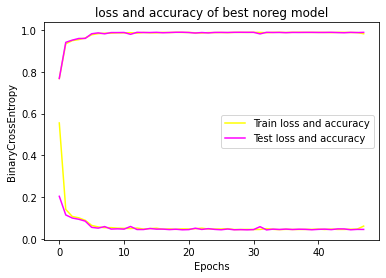

In [0]:
plt.plot(history_best_model_noreg['loss'], color = 'yellow', label = 'Train loss and accuracy')
plt.plot(history_best_model_noreg['accuracy'], color = 'yellow')
plt.plot(history_best_model_noreg['val_loss'], color = 'magenta', label = 'Test loss and accuracy')
plt.plot(history_best_model_noreg['val_accuracy'], color = 'magenta')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('loss and accuracy of best noreg model')
plt.legend()
plt.show()

In [15]:
from keras.regularizers import l2
from keras.regularizers import l1
def build_L2_model():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model
L2_model1 = build_L2_model()
L2_history1 = L2_model1.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=10).history
L2_model2 = build_L2_model()
L2_history2 = L2_model2.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=50).history
L2_model3 = build_L2_model()
L2_history3 = L2_model2.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=100).history
L2_model4 = build_L2_model()
L2_history4 = L2_model4.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=150).history
def build_L2_model2():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model
L2_model5 = build_L2_model2()
L2_history5 = L2_model5.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=10).history
L2_model6 = build_L2_model2()
L2_history6 = L2_model6.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=50).history
L2_model7 = build_L2_model2()
L2_history7 = L2_model7.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=100).history
L2_model8 = build_L2_model2()
L2_history8 = L2_model8.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=150).history
def build_L2_model3():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model
L2_model9 = build_L2_model3()
L2_history9 = L2_model9.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=10).history
L2_model10 = build_L2_model3()
L2_history10 = L2_model10.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=50).history
L2_model11 = build_L2_model3()
L2_history11 = L2_model11.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=100).history
L2_model12 = build_L2_model3()
L2_history12 = L2_model12.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=150).history
def build_L2_model4():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model
L2_model13 = build_L2_model4()
L2_history13 = L2_model13.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=10).history
L2_model14 = build_L2_model4()
L2_history14 = L2_model14.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=50).history
L2_model15 = build_L2_model4()
L2_history15 = L2_model15.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=100).history
L2_model16 = build_L2_model4()
L2_history16 = L2_model16.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=150).history
def build_L2_model5():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model
L2_model17 = build_L2_model5()
L2_history17 = L2_model17.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=10).history
L2_model18 = build_L2_model5()
L2_history18 = L2_model18.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=50).history
L2_model19 = build_L2_model5()
L2_history19 = L2_model19.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=100).history
L2_model20 = build_L2_model5()
L2_history20 = L2_model20.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=150).history
def build_L2_model6():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model
L2_model21 = build_L2_model6()
L2_history21 = L2_model21.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=10).history
L2_model22 = build_L2_model6()
L2_history22 = L2_model22.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=50).history
L2_model23 = build_L2_model6()
L2_history23 = L2_model23.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=100).history
L2_model24 = build_L2_model6()
L2_history24 = L2_model24.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=150).history
def build_L2_model7():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model
L2_model25 = build_L2_model7()
L2_history25 = L2_model25.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=10).history
L2_model26 = build_L2_model7()
L2_history26 = L2_model26.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=50).history
L2_model27 = build_L2_model7()
L2_history27 = L2_model27.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=100).history
L2_model28 = build_L2_model7()
L2_history28 = L2_model28.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=150).history 
def build_L2_model8():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model
L2_model26 = build_L2_model8()
L2_history27 = L2_model27.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=10).history
L2_model28 = build_L2_model8()
L2_history28 = L2_model28.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=50).history
L2_model29 = build_L2_model8()
L2_history29 = L2_model29.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=100).history
L2_model30 = build_L2_model8()
L2_history30 = L2_model30.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=150).history
def build_L2_model9():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model
L2_model31 = build_L2_model9()
L2_history31 = L2_model31.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=10).history
L2_model32 = build_L2_model9()
L2_history32 = L2_model32.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=50).history
L2_model33 = build_L2_model9()
L2_history33 = L2_model33.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=100).history
L2_model34 = build_L2_model9()
L2_history34 = L2_model34.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=150).history 


test_loss_1, test_custom_acc_1, test_acc_1 = L2_model1.evaluate(X_test, y_test)
test_loss_2, test_custom_acc_2, test_acc_2 = L2_model2.evaluate(X_test, y_test)
test_loss_3, test_custom_acc_3, test_acc_3 = L2_model3.evaluate(X_test, y_test)
test_loss_4, test_custom_acc_4, test_acc_4 = L2_model4.evaluate(X_test, y_test)
test_loss_5, test_custom_acc_5, test_acc_5 = L2_model5.evaluate(X_test, y_test)
test_loss_6, test_custom_acc_6, test_acc_6 = L2_model6.evaluate(X_test, y_test)
test_loss_7, test_custom_acc_7, test_acc_7 = L2_model7.evaluate(X_test, y_test)
test_loss_8, test_custom_acc_8, test_acc_8 = L2_model8.evaluate(X_test, y_test)
test_loss_9, test_custom_acc_9, test_acc_9 = L2_model9.evaluate(X_test, y_test)
test_loss_10, test_custom_acc_10, test_acc_10 = L2_model10.evaluate(X_test, y_test)
test_loss_11, test_custom_acc_11, test_acc_11 = L2_model11.evaluate(X_test, y_test)
test_loss_12, test_custom_acc_12, test_acc_12 = L2_model12.evaluate(X_test, y_test)
test_loss_13, test_custom_acc_13, test_acc_13 = L2_model13.evaluate(X_test, y_test)
test_loss_14, test_custom_acc_14, test_acc_14 = L2_model14.evaluate(X_test, y_test)
test_loss_15, test_custom_acc_15, test_acc_15 = L2_model15.evaluate(X_test, y_test)
test_loss_16, test_custom_acc_16, test_acc_16 = L2_model16.evaluate(X_test, y_test)
test_loss_17, test_custom_acc_17, test_acc_17 = L2_model17.evaluate(X_test, y_test)
test_loss_18, test_custom_acc_18, test_acc_18 = L2_model18.evaluate(X_test, y_test)
test_loss_19, test_custom_acc_19, test_acc_19 = L2_model19.evaluate(X_test, y_test)
test_loss_20, test_custom_acc_20, test_acc_20 = L2_model20.evaluate(X_test, y_test)
test_loss_21, test_custom_acc_21, test_acc_21 = L2_model21.evaluate(X_test, y_test)
test_loss_22, test_custom_acc_22, test_acc_22 = L2_model22.evaluate(X_test, y_test)
test_loss_23, test_custom_acc_23, test_acc_23 = L2_model23.evaluate(X_test, y_test)
test_loss_24, test_custom_acc_24, test_acc_24 = L2_model24.evaluate(X_test, y_test)
test_loss_25, test_custom_acc_25, test_acc_25 = L2_model25.evaluate(X_test, y_test)
test_loss_26, test_custom_acc_26, test_acc_26 = L2_model26.evaluate(X_test, y_test)
test_loss_27, test_custom_acc_27, test_acc_27 = L2_model27.evaluate(X_test, y_test)
test_loss_28, test_custom_acc_28, test_acc_28 = L2_model28.evaluate(X_test, y_test)
test_loss_29, test_custom_acc_29, test_acc_29 = L2_model29.evaluate(X_test, y_test)
test_loss_30, test_custom_acc_30, test_acc_30 = L2_model30.evaluate(X_test, y_test)
test_loss_31, test_custom_acc_31, test_acc_31 = L2_model31.evaluate(X_test, y_test)
test_loss_32, test_custom_acc_32, test_acc_32 = L2_model32.evaluate(X_test, y_test)
test_loss_33, test_custom_acc_33, test_acc_33 = L2_model33.evaluate(X_test, y_test)
test_loss_34, test_custom_acc_34, test_acc_34 = L2_model34.evaluate(X_test, y_test)
print('numero 1','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_1, test_custom_acc_1, test_acc_1))
print('numero 2','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_2, test_custom_acc_2, test_acc_2))
print('numero 3','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_3, test_custom_acc_3, test_acc_3))
print('numero 4','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_4, test_custom_acc_4, test_acc_4))
print('numero 5','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_5, test_custom_acc_5, test_acc_5))
print('numero 6','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_6, test_custom_acc_6, test_acc_6))
print('numero 7','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_7, test_custom_acc_7, test_acc_7))
print('numero 8','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_8, test_custom_acc_8, test_acc_8))
print('numero 9','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_9, test_custom_acc_9, test_acc_9))
print('numero 10','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_10, test_custom_acc_10, test_acc_10))
print('numero 11','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_11, test_custom_acc_11, test_acc_11))
print('numero 12','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_12, test_custom_acc_12, test_acc_12))
print('numero 13','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_13, test_custom_acc_13, test_acc_13))
print('numero 14','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_14, test_custom_acc_14, test_acc_14))
print('numero 15','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_15, test_custom_acc_15, test_acc_15))
print('numero 16','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_16, test_custom_acc_16, test_acc_16))
print('numero 17','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_17, test_custom_acc_17, test_acc_17))
print('numero 18','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_18, test_custom_acc_18, test_acc_18))
print('numero 19','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_19, test_custom_acc_19, test_acc_19))
print('numero 20','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_20, test_custom_acc_20, test_acc_20))
print('numero 21','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_21, test_custom_acc_21, test_acc_21))
print('numero 22','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_22, test_custom_acc_22, test_acc_22))
print('numero 23','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_23, test_custom_acc_23, test_acc_23))
print('numero 24','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_24, test_custom_acc_24, test_acc_24))
print('numero 25','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_25, test_custom_acc_25, test_acc_25))
print('numero 26','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_26, test_custom_acc_26, test_acc_26))
print('numero 27','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_27, test_custom_acc_27, test_acc_27))
print('numero 28','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_28, test_custom_acc_28, test_acc_28))
print('numero 29','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_29, test_custom_acc_29, test_acc_29))
print('numero 30','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_30, test_custom_acc_30, test_acc_30))
print('numero 31','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_31, test_custom_acc_31, test_acc_31))
print('numero 32','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_32, test_custom_acc_32, test_acc_32))
print('numero 33','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_33, test_custom_acc_33, test_acc_33))
print('numero 34','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_34, test_custom_acc_34, test_acc_34))

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 3s 245us/step - loss: 0.5696 - custom_accuracy: 0.7675 - accuracy: 0.7676 - val_loss: 0.5459 - val_custom_accuracy: 0.7684 - val_accuracy: 0.7682
Epoch 2/500
11513/11513 [==============================] - 2s 213us/step - loss: 0.5442 - custom_accuracy: 0.7684 - accuracy: 0.7683 - val_loss: 0.5428 - val_custom_accuracy: 0.7684 - val_accuracy: 0.7682
Epoch 3/500
11513/11513 [==============================] - 2s 211us/step - loss: 0.5426 - custom_accuracy: 0.7684 - accuracy: 0.7683 - val_loss: 0.5419 - val_custom_accuracy: 0.7684 - val_accuracy: 0.7682
Epoch 4/500
11513/11513 [==============================] - 2s 212us/step - loss: 0.5418 - custom_accuracy: 0.7684 - accuracy: 0.7683 - val_loss: 0.5418 - val_custom_accuracy: 0.7684 - val_accuracy: 0.7682
Epoch 5/500
11513/11513 [==============================] - 2s 215us/step - loss: 0.5417 - custom_accuracy: 0.7680 - accuracy: 0.768

In [0]:
# NUMERO 23 VINCE

In [17]:
best_L2_model = build_L2_model6()
best_L2_history = best_L2_model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size=100).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 1s 56us/step - loss: 0.6022 - custom_accuracy: 0.7683 - accuracy: 0.7683 - val_loss: 0.2772 - val_custom_accuracy: 0.7675 - val_accuracy: 0.7682
Epoch 2/500
11513/11513 [==============================] - 0s 27us/step - loss: 0.2406 - custom_accuracy: 0.7683 - accuracy: 0.7683 - val_loss: 0.2127 - val_custom_accuracy: 0.7675 - val_accuracy: 0.7682
Epoch 3/500
11513/11513 [==============================] - 0s 26us/step - loss: 0.2033 - custom_accuracy: 0.9339 - accuracy: 0.9334 - val_loss: 0.2443 - val_custom_accuracy: 0.8096 - val_accuracy: 0.8101
Epoch 4/500
11513/11513 [==============================] - 0s 26us/step - loss: 0.1843 - custom_accuracy: 0.9727 - accuracy: 0.9725 - val_loss: 0.1654 - val_custom_accuracy: 0.9880 - val_accuracy: 0.9882
Epoch 5/500
11513/11513 [==============================] - 0s 26us/step - loss: 0.1001 - custom_accuracy: 0.9862 - accuracy: 0.9867 - v

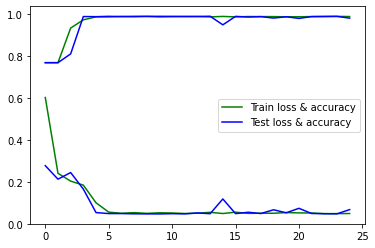

In [18]:
plt.plot(best_L2_history['loss'], color = 'green', label = 'Train loss & accuracy')
plt.plot(best_L2_history['accuracy'], color = 'green')
plt.plot(best_L2_history['val_loss'], color = 'blue', label = 'Test loss & accuracy')
plt.plot(best_L2_history['val_accuracy'], color = 'blue')
plt.legend()
plt.show()

MODELLO NUMERO:  1
Accuracy 0.9894630192502533
F1-score [0.99309979 0.97772065]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935



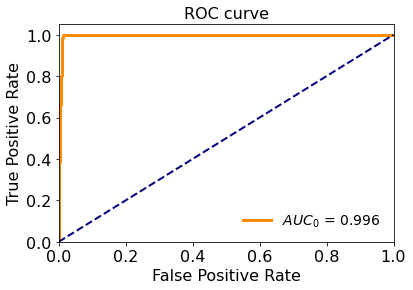

MODELLO NUMERO:  2
Accuracy 0.9805471124620061
F1-score [0.98718291 0.95966387]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3791
           1       0.92      1.00      0.96      1144

    accuracy                           0.98      4935
   macro avg       0.96      0.99      0.97      4935
weighted avg       0.98      0.98      0.98      4935



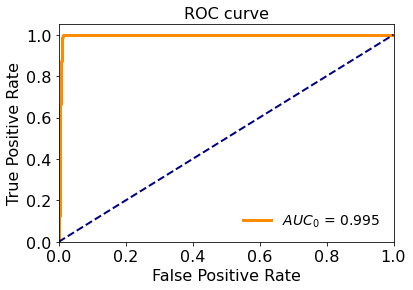

In [19]:
modelli = [best_model_noreg, best_L2_model]
k = 1
for i in modelli:
  print('MODELLO NUMERO: ',k)
  k +=1 
  y_pred = i.predict_classes(X_test)

  print('Accuracy %s' % accuracy_score(y_test, y_pred))
  print('F1-score %s' % f1_score(y_test, y_pred, average=None))
  print(classification_report(y_test, y_pred))
  y_score = i.predict_proba(X_test)
  fpr0, tpr0, _ = roc_curve(y_test, y_score)
  roc_auc0 = auc(fpr0, tpr0)
  plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.title('ROC curve', fontsize=16)
  plt.legend(loc="lower right", fontsize=14, frameon=False)
  plt.tick_params(axis='both', which='major', labelsize=16)
  plt.show()